In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

df = pd.read_csv('Latest Football  Players 2024 Data.csv')
df.head()

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


In [3]:
df.isnull().sum()

Teams              0
Seasons            0
Players            0
Matches            0
Goals              0
Assists            0
Seasons Ratings    0
dtype: int64

In [4]:
df.dropna()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4
...,...,...,...,...,...,...,...
1211,Real Sociedad,2020/2021,Mikel Oyarzabal,43,13,10,7.1
1212,Real Sociedad,2019/2020,Mikel Oyarzabal,45,13,13,7.1
1213,Real Sociedad,2018/2019,Mikel Oyarzabal,41,14,2,6.7
1214,Real Sociedad,2017/2018,Mikel Oyarzabal,43,14,6,7.0


In [5]:
df = df.replace([np.inf, -np.inf], np.nan)

In [6]:
# making sure data types are correct

df['Goals'] = df['Goals'].astype(int)
df['Assists'] = df['Assists'].astype(int)
df['Seasons Ratings'] = df['Seasons Ratings'].astype(float)
df.dtypes

Teams               object
Seasons             object
Players             object
Matches              int64
Goals                int64
Assists              int64
Seasons Ratings    float64
dtype: object

In [7]:
df[['Goals', 'Assists', 'Seasons Ratings']].describe()

,Goals,Assists,Seasons Ratings
count,1216.000000,1216.000000,1216.000000
mean,8.059211,4.797697,7.111595
std,9.351558,4.496019,0.410907
min,0.000000,0.000000,5.100000
25%,2.000000,1.000000,6.900000
50%,4.000000,4.000000,7.100000
75%,12.000000,7.000000,7.300000
max,55.000000,25.000000,8.900000


In [8]:
correlationMatrix = df[['Goals', 'Assists', 'Seasons Ratings']].corr()
correlationMatrix

,Goals,Assists,Seasons Ratings
Goals,1.000000,0.562081,0.510339
Assists,0.562081,1.000000,0.553651
Seasons Ratings,0.510339,0.553651,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

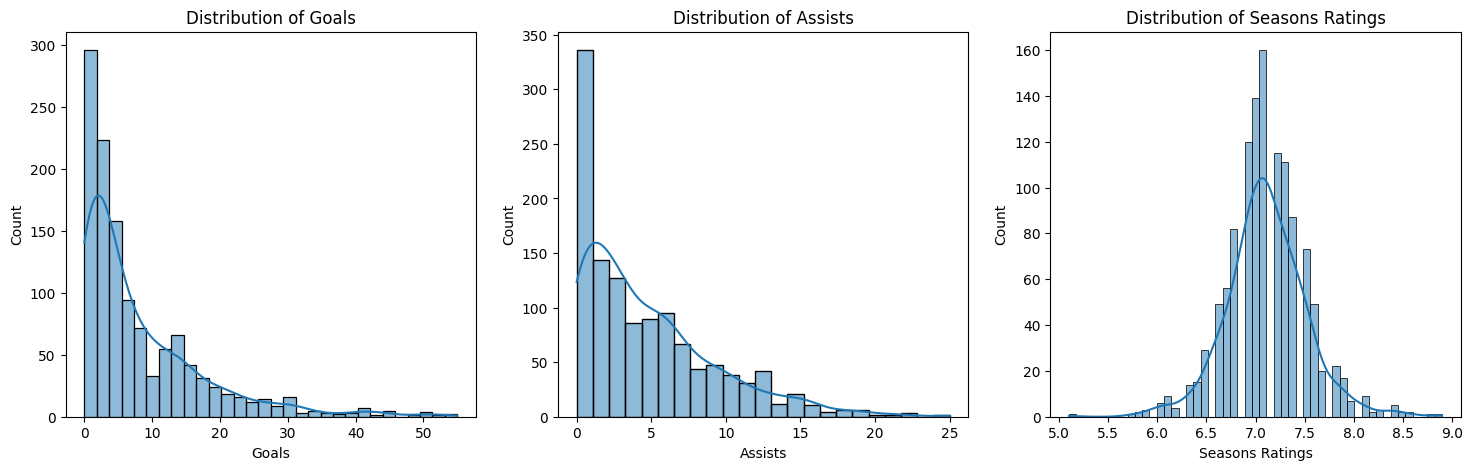

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Goals'], kde=True, ax=axs[0]).set_title('Distribution of Goals')
sns.histplot(df['Assists'], kde=True, ax=axs[1]).set_title('Distribution of Assists')
sns.histplot(df['Seasons Ratings'], kde=True, ax=axs[2]).set_title('Distribution of Seasons Ratings')

plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


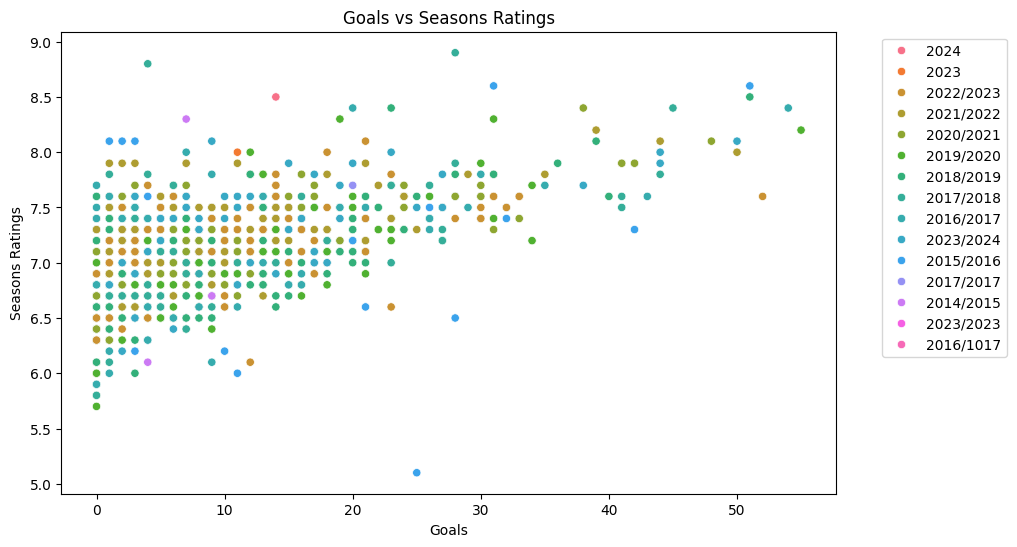

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Goals', y='Seasons Ratings', hue='Seasons')
plt.title('Goals vs Seasons Ratings')
plt.xlabel('Goals')
plt.ylabel('Seasons Ratings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

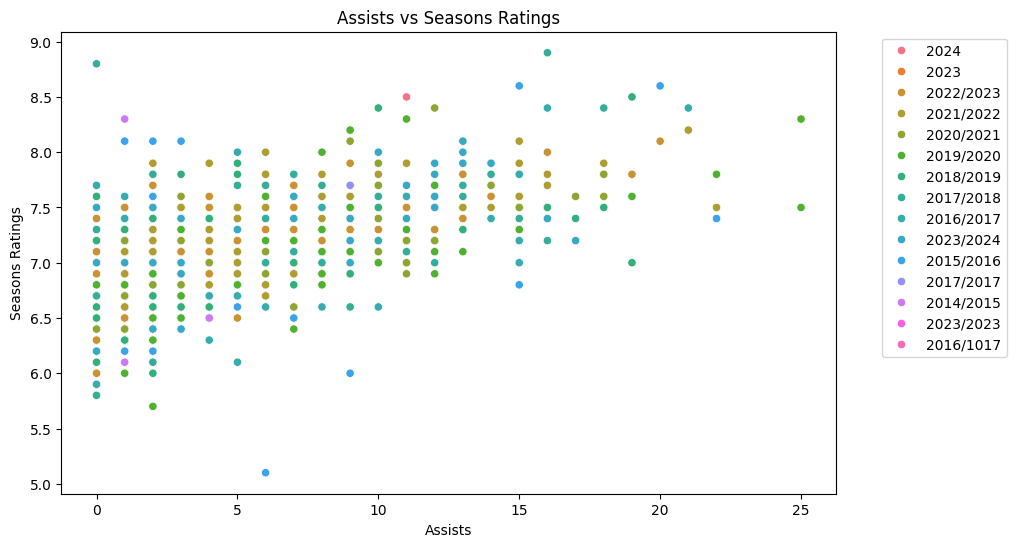

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Assists', y='Seasons Ratings', hue='Seasons')
plt.title('Assists vs Seasons Ratings')
plt.xlabel('Assists')
plt.ylabel('Seasons Ratings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
df['Seasons Ratings'] = np.exp(df['Seasons Ratings'])

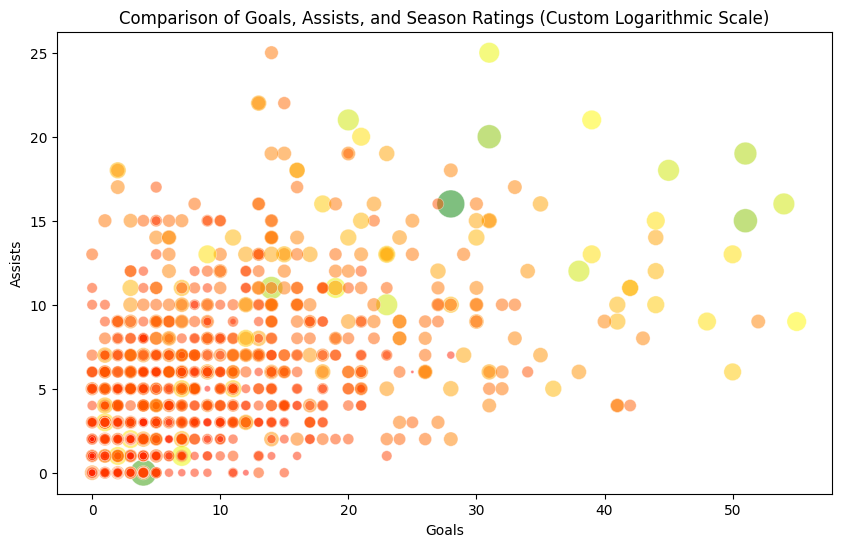

In [15]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10, 6))
colors = ['red', 'yellow', 'green']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


bubble_plot = sns.scatterplot(data=df, x='Goals', y='Assists', size='Seasons Ratings', sizes=(5, 400), legend=False, hue='Seasons Ratings', palette=cmap,alpha=0.5)
bubble_plot.set_title('Comparison of Goals, Assists, and Season Ratings (Custom Logarithmic Scale)')
bubble_plot.set_xlabel('Goals')
bubble_plot.set_ylabel('Assists')

plt.show()